In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Задания

In [2]:
df = pd.DataFrame({'client_id':[np.nan,3998,np.nan,np.nan,5736],
                   'sex':[np.nan,1,np.nan,np.nan,0],
                   'wealth':[np.nan,'high',np.nan,np.nan,'high'],
                   'age':['58','55','46','23','44']})
df_shape = 'df has {} rows and {} columns'.format(*df.shape)
df_shape

'df has 5 rows and 4 columns'

In [3]:
df.isnull().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

In [4]:
df_dtypes = df.dtypes
df_dtypes

client_id    float64
sex          float64
wealth        object
age           object
dtype: object

In [5]:
df['age'] = df['age'].astype(int)

In [6]:
df = df.drop(['age','sex'],axis=1)
df

,client_id,wealth
0,NaN,NaN
1,3998.0,high
2,NaN,NaN
3,NaN,NaN
4,5736.0,high


In [7]:
df = df[~df.client_id.duplicated()]
df
# df.drop_duplicates(subset=['client_id],keep='first)

,client_id,wealth
0,NaN,NaN
1,3998.0,high
4,5736.0,high


In [8]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i==0:
        break
    elif i>0:
        positive_numbers.append(i)
positive_numbers

[1, 3]

In [9]:
taxi = pd.read_csv('/Users/varya_hai/Karpov.courses/3_taxi_peru.csv',sep=';')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [10]:
for col in ['start_at','end_at','arrived_at']:
    taxi[col] = pd.to_datetime(taxi[col])

In [11]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [12]:
taxi = taxi\
    .query('start_type=="asap" | start_type=="reserved"')

In [13]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']) / np.timedelta64(1, 'm')

In [14]:
taxi[['start_at','arrived_at','wait_time']].head()

,start_at,arrived_at,wait_time
0,2010-11-16 16:44:00,2010-11-16 17:02:00,18.0
1,2010-06-01 00:34:00,NaT,NaN
2,2010-05-31 05:01:00,NaT,NaN
3,2010-06-01 00:29:00,NaT,NaN
4,2010-09-11 23:55:00,2010-09-11 23:50:00,-5.0


In [15]:
taxi\
    .query('start_type=="reserved" & wait_time>0.0')\
    .driver_id\
    .value_counts()\
    .idxmax()

'406921adcca37705ef527b4246c0cfea'

In [16]:
taxi['month']=taxi.start_at.dt.month
taxi['weekday']=taxi.start_at.dt.strftime('%A')

In [17]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10696/470139843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=taxi, x='month',palette='pastel')


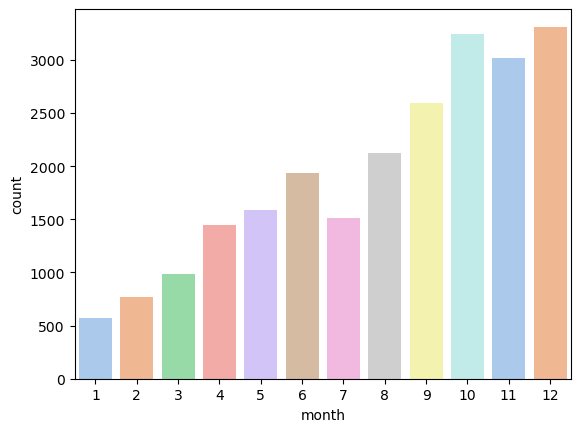

In [18]:
ax = sns.countplot(data=taxi, x='month',palette='pastel')

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10696/3800955250.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(taxi.weekday,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='pastel')


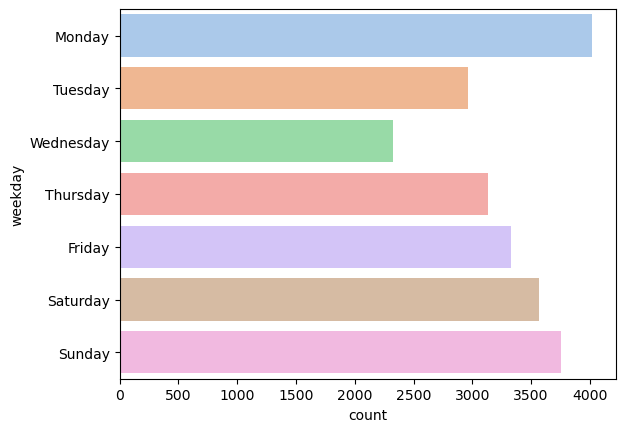

In [19]:
ax = sns.countplot(taxi.weekday,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='pastel')

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10696/1086906741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month',y='user_id',data=mau,palette='pastel')


<AxesSubplot:xlabel='month', ylabel='user_id'>

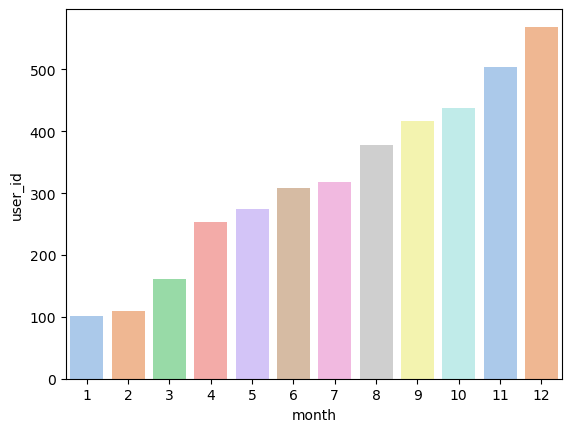

In [20]:
mau = taxi\
    .groupby('month',as_index=False)\
    .user_id\
    .nunique()
    
sns.barplot(x='month',y='user_id',data=mau,palette='pastel')

# Минипроект

In [21]:
def new_df():
    df = pd.DataFrame({'product_id':[],
                   'quantity':[],
                   'name':[],
                   'date':[]})
    path = '/Users/varya_hai/Karpov.courses/data'
    for date in os.listdir(path):
        if not date.startswith('.'):
            for name in os.listdir(path+'/{}'.format(date)):
                if not name.startswith('.'):
                    data = pd.read_csv(path+'/{}/{}/data.csv'.format(date,name))
                    data['name'] = name
                    data['date'] = date
                    data = data.drop('Unnamed: 0',axis=1)
                    data['date'] = pd.to_datetime(data['date']).dt.date
                    df = pd.concat([df,data])
    return df

In [22]:
df = new_df()

In [23]:
df.head()

,product_id,quantity,name,date
0,56.0,4.0,Vasiliy_Fedorov,2020-12-06
1,97.0,3.0,Vasiliy_Fedorov,2020-12-06
2,79.0,3.0,Vasiliy_Fedorov,2020-12-06
3,29.0,5.0,Vasiliy_Fedorov,2020-12-06
0,73.0,5.0,Alexey_Fedorov,2020-12-08


In [24]:
df.quantity.sum()

480.0

In [25]:
df\
    .name\
    .value_counts()\
    .idxmax()

'Alexey_Smirnov'

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10696/3197264616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id',y='quantity',data=df\


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

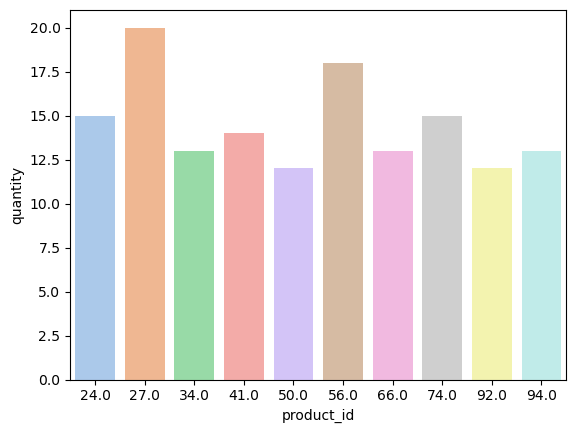

In [26]:
sns.barplot(x='product_id',y='quantity',data=df\
                                        .groupby('product_id',as_index=False)\
                                        .agg({'quantity':'sum'})\
                                        .sort_values('quantity',ascending=False)\
                                        .head(10),
                                        palette='pastel')

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10696/1640964915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date',y='quantity',data=df\


Text(0.5, 1.0, 'Покупки по дням')

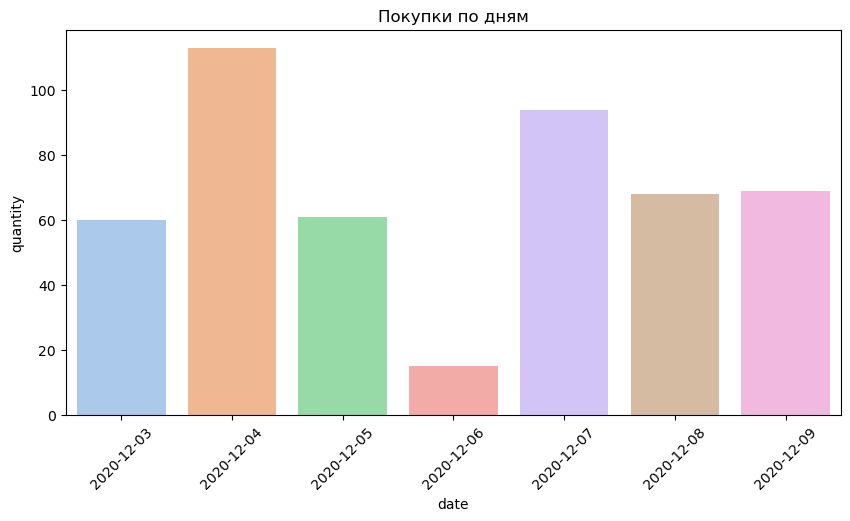

In [28]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='date',y='quantity',data=df\
                                        .groupby('date',as_index=False)\
                                        .agg({'quantity':'sum'})\
                                        .sort_values('date')
                                 ,palette='pastel')

ax.tick_params(axis='x',rotation=45)
ax.set_title('Покупки по дням')

In [29]:
sum(df[~df[['product_id','name','date']].duplicated()==True]\
    [['name','product_id']]\
    .value_counts() >= 2)


2